In [1]:
import pandas as pd
import numpy as np
import h5py
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
# Testing the dataset 
path_single = r"C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_1.h5"
path_single_mask = r"C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_1.h5"

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ls ['img']
input data shape: (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


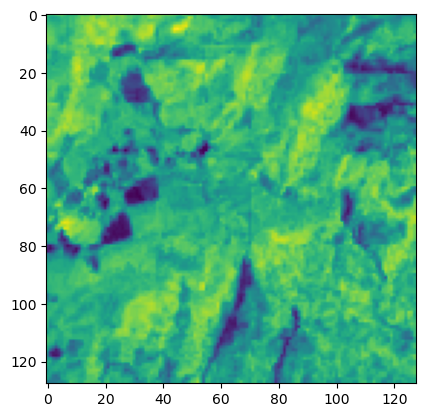

In [3]:
f_data = np.zeros((1, 128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('img'))
    print("input data shape:", data.shape)
    plt.imshow(data[:, :, 3:0:-1])
    
    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)

ls ['mask']
input data shape: (128, 128)


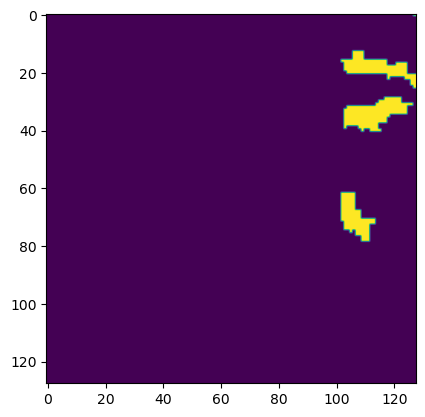

In [4]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print("ls", ls)
    data = np.array(hdf.get('mask'))
    print("input data shape:", data.shape)
    plt.imshow(data)

In [5]:
# path_single = r"C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2.h5"
# path_single_mask = r"C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2.h5"
TRAIN_PATH = r"C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\*.h5"
TRAIN_MASK = r'C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\*.h5'

TRAIN_XX = np.zeros((3799, 128, 128, 6))
TRAIN_YY = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

In [6]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        TRAIN_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb  #RED
        TRAIN_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        TRAIN_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        TRAIN_XX[i, :, :, 3] = data_ndvi #NDVI
        TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE
        TRAIN_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
    
    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        TRAIN_YY[i, :, :, 0] = data
    

0 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_1.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_1.h5
1 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_10.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_10.h5
2 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_100.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_100.h5
3 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_1000.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_1000.h5
4 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_1001.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_

C:\Users\satee\AppData\Local\Temp\ipykernel_19580\3444182847.py:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1672 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_2503.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_2503.h5
1673 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_2504.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_2504.h5
1674 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_2505.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_2505.h5
1675 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_2506.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_2506.h5
1676 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_2507.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\a

C:\Users\satee\AppData\Local\Temp\ipykernel_19580\3444182847.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2267 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_3039.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_3039.h5
2268 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_304.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_304.h5
2269 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_3040.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_3040.h5
2270 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_3041.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\mask\mask_3041.h5
2271 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\TrainData\img\image_3042.h5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\arc

1118 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2004.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2004.h5
1119 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2005.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2005.h5
1120 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2006.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2006.h5
1121 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2007.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2007.h5
1122 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2008.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2008.h5
1123 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2009.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2009.h

1185 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2065.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2065.h5
1186 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2066.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2066.h5
1187 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2067.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2067.h5
1188 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2068.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2068.h5
1189 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2069.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2069.h5
1190 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_207.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_207.h5


1235 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_211.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_211.h5
1236 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2110.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2110.h5
1237 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2111.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2111.h5
1238 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2112.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2112.h5
1239 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2113.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2113.h5
1240 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2114.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2114.h5


1285 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2155.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2155.h5
1286 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2156.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2156.h5
1287 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2157.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2157.h5
1288 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2158.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2158.h5
1289 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2159.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2159.h5
1290 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_216.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_216.h5


1351 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2214.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2214.h5
1352 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2215.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2215.h5
1353 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2216.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2216.h5
1354 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2217.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2217.h5
1355 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2218.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2218.h5
1356 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2219.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2219.h

1401 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_226.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_226.h5
1402 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2260.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2260.h5
1403 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2261.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2261.h5
1404 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2262.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2262.h5
1405 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2263.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2263.h5
1406 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2264.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2264.h5


1452 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2305.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2305.h5
1453 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2306.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2306.h5
1454 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2307.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2307.h5
1455 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2308.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2308.h5
1456 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2309.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2309.h5
1457 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_231.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_231.h5


1519 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2366.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2366.h5
1520 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2367.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2367.h5
1521 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2368.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2368.h5
1522 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2369.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2369.h5
1523 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_237.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_237.h5
1524 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2370.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2370.h5


1583 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2423.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2423.h5
1584 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2424.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2424.h5
1585 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2425.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2425.h5
1586 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2426.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2426.h5
1587 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2427.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2427.h5
1588 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2428.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2428.h

1634 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_247.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_247.h5
1635 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2470.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2470.h5
1636 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2471.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2471.h5
1637 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2472.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2472.h5
1638 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2473.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2473.h5
1639 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2474.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2474.h5


C:\Users\nigel\AppData\Local\Temp\ipykernel_14164\3444182847.py:25: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1682 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2512.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2512.h5
1683 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2513.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2513.h5
1684 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2514.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2514.h5
1685 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2515.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2515.h5
1686 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2516.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2516.h5
1687 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2517.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2517.h

1732 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2558.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2558.h5
1733 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2559.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2559.h5
1734 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_256.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_256.h5
1735 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2560.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2560.h5
1736 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2561.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2561.h5
1737 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2562.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2562.h5


1795 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2614.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2614.h5
1796 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2615.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2615.h5
1797 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2616.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2616.h5
1798 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2617.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2617.h5
1799 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2618.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2618.h5
1800 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2619.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2619.h

1855 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2669.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2669.h5
1856 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_267.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_267.h5
1857 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2670.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2670.h5
1858 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2671.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2671.h5
1859 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2672.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2672.h5
1860 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2673.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2673.h5


1912 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_272.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_272.h5
1913 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2720.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2720.h5
1914 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2721.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2721.h5
1915 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2722.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2722.h5
1916 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2723.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2723.h5
1917 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2724.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2724.h5


1972 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2774.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2774.h5
1973 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2775.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2775.h5
1974 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2776.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2776.h5
1975 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2777.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2777.h5
1976 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2778.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2778.h5
1977 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2779.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2779.h

2030 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2826.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2826.h5
2031 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2827.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2827.h5
2032 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2828.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2828.h5
2033 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2829.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2829.h5
2034 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_283.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_283.h5
2035 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2830.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2830.h5


2089 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_288.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_288.h5
2090 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2880.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2880.h5
2091 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2881.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2881.h5
2092 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2882.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2882.h5
2093 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2883.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2883.h5
2094 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2884.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2884.h5


2153 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2937.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2937.h5
2154 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2938.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2938.h5
2155 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2939.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2939.h5
2156 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_294.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_294.h5
2157 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2940.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2940.h5
2158 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2941.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2941.h5


2203 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2982.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2982.h5
2204 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2983.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2983.h5
2205 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2984.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2984.h5
2206 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2985.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2985.h5
2207 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2986.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2986.h5
2208 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_2987.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_2987.h

C:\Users\nigel\AppData\Local\Temp\ipykernel_14164\3444182847.py:18: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2269 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3040.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3040.h5
2270 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3041.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3041.h5
2271 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3042.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3042.h5
2272 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3043.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3043.h5
2273 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3044.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3044.h5
2274 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3045.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3045.h

2334 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_31.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_31.h5
2335 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_310.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_310.h5
2336 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3100.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3100.h5
2337 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3101.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3101.h5
2338 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3102.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3102.h5
2339 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3103.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3103.h5
2340

2384 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3144.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3144.h5
2385 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3145.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3145.h5
2386 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3146.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3146.h5
2387 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3147.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3147.h5
2388 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3148.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3148.h5
2389 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3149.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3149.h

2434 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_319.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_319.h5
2435 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3190.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3190.h5
2436 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3191.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3191.h5
2437 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3192.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3192.h5
2438 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3193.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3193.h5
2439 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3194.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3194.h5


2499 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3248.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3248.h5
2500 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3249.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3249.h5
2501 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_325.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_325.h5
2502 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3250.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3250.h5
2503 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3251.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3251.h5
2504 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3252.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3252.h5


2562 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3304.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3304.h5
2563 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3305.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3305.h5
2564 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3306.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3306.h5
2565 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3307.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3307.h5
2566 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3308.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3308.h5
2567 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3309.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3309.h

2624 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3360.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3360.h5
2625 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3361.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3361.h5
2626 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3362.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3362.h5
2627 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3363.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3363.h5
2628 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3364.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3364.h5
2629 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3365.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3365.h

2687 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3417.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3417.h5
2688 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3418.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3418.h5
2689 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3419.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3419.h5
2690 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_342.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_342.h5
2691 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3420.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3420.h5
2692 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3421.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3421.h5


2750 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3474.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3474.h5
2751 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3475.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3475.h5
2752 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3476.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3476.h5
2753 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3477.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3477.h5
2754 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3478.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3478.h5
2755 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3479.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3479.h

2812 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_353.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_353.h5
2813 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3530.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3530.h5
2814 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3531.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3531.h5
2815 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3532.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3532.h5
2816 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3533.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3533.h5
2817 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3534.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3534.h5


2875 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3587.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3587.h5
2876 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3588.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3588.h5
2877 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3589.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3589.h5
2878 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_359.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_359.h5
2879 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3590.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3590.h5
2880 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3591.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3591.h5


2933 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3639.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3639.h5
2934 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_364.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_364.h5
2935 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3640.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3640.h5
2936 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3641.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3641.h5
2937 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3642.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3642.h5
2938 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3643.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3643.h5


2996 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3696.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3696.h5
2997 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3697.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3697.h5
2998 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3698.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3698.h5
2999 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3699.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3699.h5
3000 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_37.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_37.h5
3001 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_370.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_370.h5
3002

3064 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3757.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3757.h5
3065 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3758.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3758.h5
3066 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3759.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3759.h5
3067 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_376.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_376.h5
3068 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3760.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3760.h5
3069 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_3761.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_3761.h5


3128 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_395.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_395.h5
3129 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_396.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_396.h5
3130 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_397.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_397.h5
3131 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_398.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_398.h5
3132 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_399.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_399.h5
3133 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_4.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_4.h5
3134 C:\shared

3185 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_446.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_446.h5
3186 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_447.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_447.h5
3187 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_448.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_448.h5
3188 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_449.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_449.h5
3189 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_45.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_45.h5
3190 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_450.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_450.h5
3191 C:\shar

3249 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_503.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_503.h5
3250 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_504.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_504.h5
3251 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_505.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_505.h5
3252 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_506.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_506.h5
3253 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_507.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_507.h5
3254 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_508.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_508.h5
3255 C:\sh

3312 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_560.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_560.h5
3313 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_561.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_561.h5
3314 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_562.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_562.h5
3315 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_563.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_563.h5
3316 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_564.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_564.h5
3317 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_565.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_565.h5
3318 C:\sh

3373 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_615.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_615.h5
3374 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_616.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_616.h5
3375 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_617.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_617.h5
3376 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_618.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_618.h5
3377 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_619.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_619.h5
3378 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_62.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_62.h5
3379 C:\shar

3435 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_671.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_671.h5
3436 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_672.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_672.h5
3437 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_673.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_673.h5
3438 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_674.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_674.h5
3439 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_675.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_675.h5
3440 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_676.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_676.h5
3441 C:\sh

3495 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_725.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_725.h5
3496 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_726.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_726.h5
3497 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_727.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_727.h5
3498 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_728.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_728.h5
3499 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_729.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_729.h5
3500 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_73.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_73.h5
3501 C:\shar

3555 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_78.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_78.h5
3556 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_780.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_780.h5
3557 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_781.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_781.h5
3558 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_782.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_782.h5
3559 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_783.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_783.h5
3560 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_784.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_784.h5
3561 C:\shar

3617 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_835.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_835.h5
3618 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_836.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_836.h5
3619 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_837.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_837.h5
3620 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_838.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_838.h5
3621 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_839.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_839.h5
3622 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_84.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_84.h5
3623 C:\shar

3678 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_890.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_890.h5
3679 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_891.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_891.h5
3680 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_892.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_892.h5
3681 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_893.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_893.h5
3682 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_894.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_894.h5
3683 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_895.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_895.h5
3684 C:\sh

3738 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_944.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_944.h5
3739 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_945.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_945.h5
3740 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_946.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_946.h5
3741 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_947.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_947.h5
3742 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_948.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_948.h5
3743 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_949.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_949.h5
3744 C:\sh

3798 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\img\image_999.h5 C:\shared doc\subjects\6th sem\DLSIP\Project\archive\TrainData\mask\mask_999.h5


In [7]:
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_XX.max(), TRAIN_YY.min(), TRAIN_YY.max())

-1.0 1.0 0.0 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


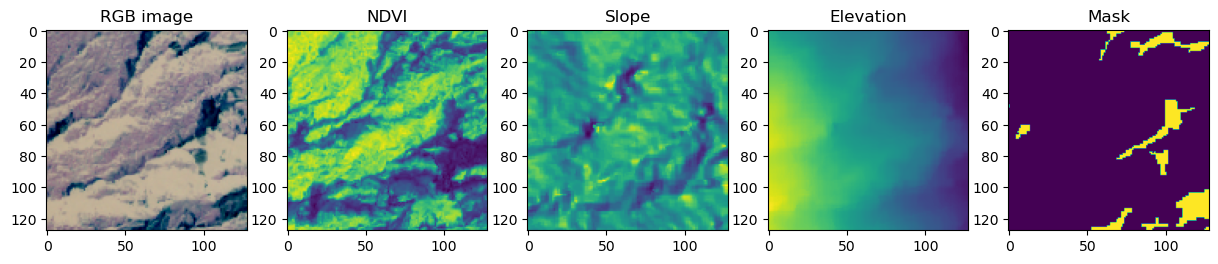

In [8]:
img=234
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(TRAIN_XX[img, :, :, 0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(TRAIN_XX, TRAIN_YY, test_size=0.4, shuffle=True)

x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, shuffle=True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


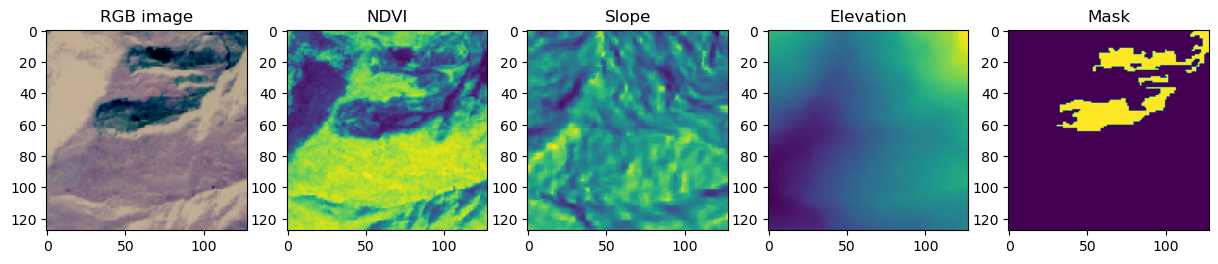

In [10]:
img=1545
fig,(ax1,ax2, ax3, ax4, ax5)= plt.subplots(1,5,figsize=(15,10))

ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("Slope")
ax4.set_title("Elevation")
ax5.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [11]:
x_train.shape, y_train.shape

((2279, 128, 128, 6), (2279, 128, 128, 1))

In [12]:
# to release some memory, delete the unnecessary variable
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


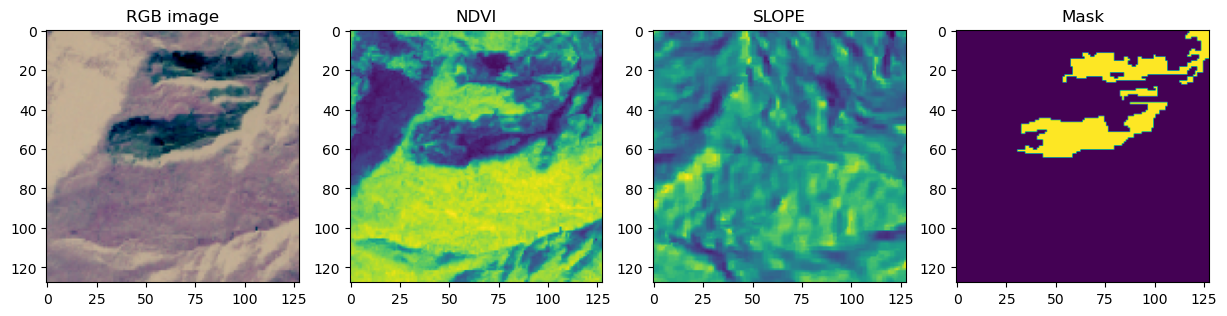

In [13]:
img=1545
fig,(ax1,ax2, ax3, ax4)= plt.subplots(1,4,figsize=(15,10))


ax1.set_title("RGB image")
ax2.set_title("NDVI")
ax3.set_title("SLOPE")
ax4.set_title("Mask")
ax1.imshow(x_train[img, :, :, 0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(y_train[img, :, :, 0])

In [14]:
import sys
sys.path.append(r"C:\shared doc\subjects\6th sem\DLSIP\Project\landslide4sense-solution-main\landslide4sense-solution-main\utils\utils.py")

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, Conv2DTranspose
from tensorflow.keras.callbacks import ModelCheckpoint
from utils import recall_m, precision_m, f1_m

def unet_plusplus_model(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS):
    inputs = Input((IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))

    # Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', padding='same')(c5)

    # Expansive path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', f1_m, precision_m, recall_m])

    return model

In [17]:
# model = unet_model(128, 128, 6)
# # model.summary()
# checkpointer = tf.keras.callbacks.ModelCheckpoint(r"C:\shared doc\subjects\6th sem\DLSIP\Project\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model.h5.keras", monitor="val_f1_m", verbose=1, save_best_only=True, mode="max")
# # earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')

# callbacks = [
#     # earlyStopping,
#     checkpointer
#     ]
# history = model.fit(x_train, y_train, batch_size=16,  
#           epochs=40,
#           verbose = 2,
#           validation_data=(x_valid, y_valid),
#           callbacks=callbacks)

# model.save("model_save.h5")

model = unet_plusplus_model(128, 128, 6)
# model.summary()

# ModelCheckpoint to save the best model based on validation performance
checkpointer = tf.keras.callbacks.ModelCheckpoint(
    r"C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model_Unet++.h5.keras",
    monitor="val_f1_m",  # You might need to define the metric function 'f1_m' for this
    verbose=1,
    save_best_only=True,
    mode="max"
)

# List of callbacks
callbacks = [
    checkpointer
]

# Train the model on train and validation data
history = model.fit(
    x_train, y_train,
    batch_size=16,
    epochs=60,
    verbose=2,
    validation_data=(x_valid, y_valid),
    callbacks=callbacks
)




Epoch 1/60

Epoch 1: val_f1_m improved from -inf to 0.48765, saving model to C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model_Unet++.h5.keras
143/143 - 142s - 992ms/step - accuracy: 0.9784 - f1_m: 0.2332 - loss: 0.0892 - precision_m: 0.4276 - recall_m: 0.1950 - val_accuracy: 0.9824 - val_f1_m: 0.4876 - val_loss: 0.0488 - val_precision_m: 0.7171 - val_recall_m: 0.3840
Epoch 2/60

Epoch 2: val_f1_m improved from 0.48765 to 0.57643, saving model to C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\landslide4sense-solution-main\landslide4sense-solution-main\model\best_model_Unet++.h5.keras
143/143 - 101s - 709ms/step - accuracy: 0.9841 - f1_m: 0.5720 - loss: 0.0437 - precision_m: 0.7032 - recall_m: 0.5038 - val_accuracy: 0.9848 - val_f1_m: 0.5764 - val_loss: 0.0411 - val_precision_m: 0.7396 - val_recall_m: 0.4834
Epoch 3/60

Epoch 3: val_f1_m improved from 0.57643 to 0.58406, saving 

In [18]:
loss, accuracy, f1_score, precision, recall = model.evaluate(x_valid, y_valid, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.0353524424135685 0.9877428412437439 0.6754367351531982 0.8008756637573242 0.5890342593193054


In [20]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
from sklearn.metrics import precision_recall_curve

def calculate_iou(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    iou = intersection / union
    return iou

# Evaluate on test set (assuming model has already been trained)
loss = model.evaluate(x_test, y_test, verbose=2)

# Predict on test set
y_pred = model.predict(x_test)

# Convert predictions and ground truth to binary arrays
threshold = 0.5  # Adjust this threshold as needed
y_pred_binary = (y_pred > threshold).astype(np.uint8)
y_test_binary = y_test.astype(np.uint8)

# Calculate precision, recall, f1_score for each class
precision = precision_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')
recall = recall_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')
f1_score_val = f1_score(y_test_binary.flatten(), y_pred_binary.flatten(), average='weighted')

# Calculate IOU (Intersection over Union)
iou = calculate_iou(y_test_binary.flatten(), y_pred_binary.flatten())

# Calculate Mean Average Precision (mAP)
# Assuming y_test_binary and y_pred_binary are in the right shape for mAP calculation
n_classes = y_test.shape[-1]  # Number of classes
average_precisions = []
for i in range(n_classes):
    average_precisions.append(average_precision_score(y_test_binary[:, :, i].flatten(), y_pred_binary[:, :, i].flatten()))

mAP = np.mean(average_precisions)

print("Test Metrics:")
print("Loss:", loss)
print("F1 Score:", f1_score_val)
print("Precision:", precision)
print("Recall:", recall)
print("IOU:", iou)
print("mAP:", mAP)


24/24 - 9s - 375ms/step - accuracy: 0.9874 - f1_m: 0.6962 - loss: 0.0358 - precision_m: 0.8177 - recall_m: 0.6078
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 370ms/step
Test Metrics:
Loss: [0.03584976866841316, 0.9874016046524048, 0.6961718201637268, 0.8176773190498352, 0.6078463196754456]
F1 Score: 0.9865015842749837
Precision: 0.9863751148594856
Recall: 0.987401620965255
IOU: 0.5448959520970592
mAP: 0.4551657583968651


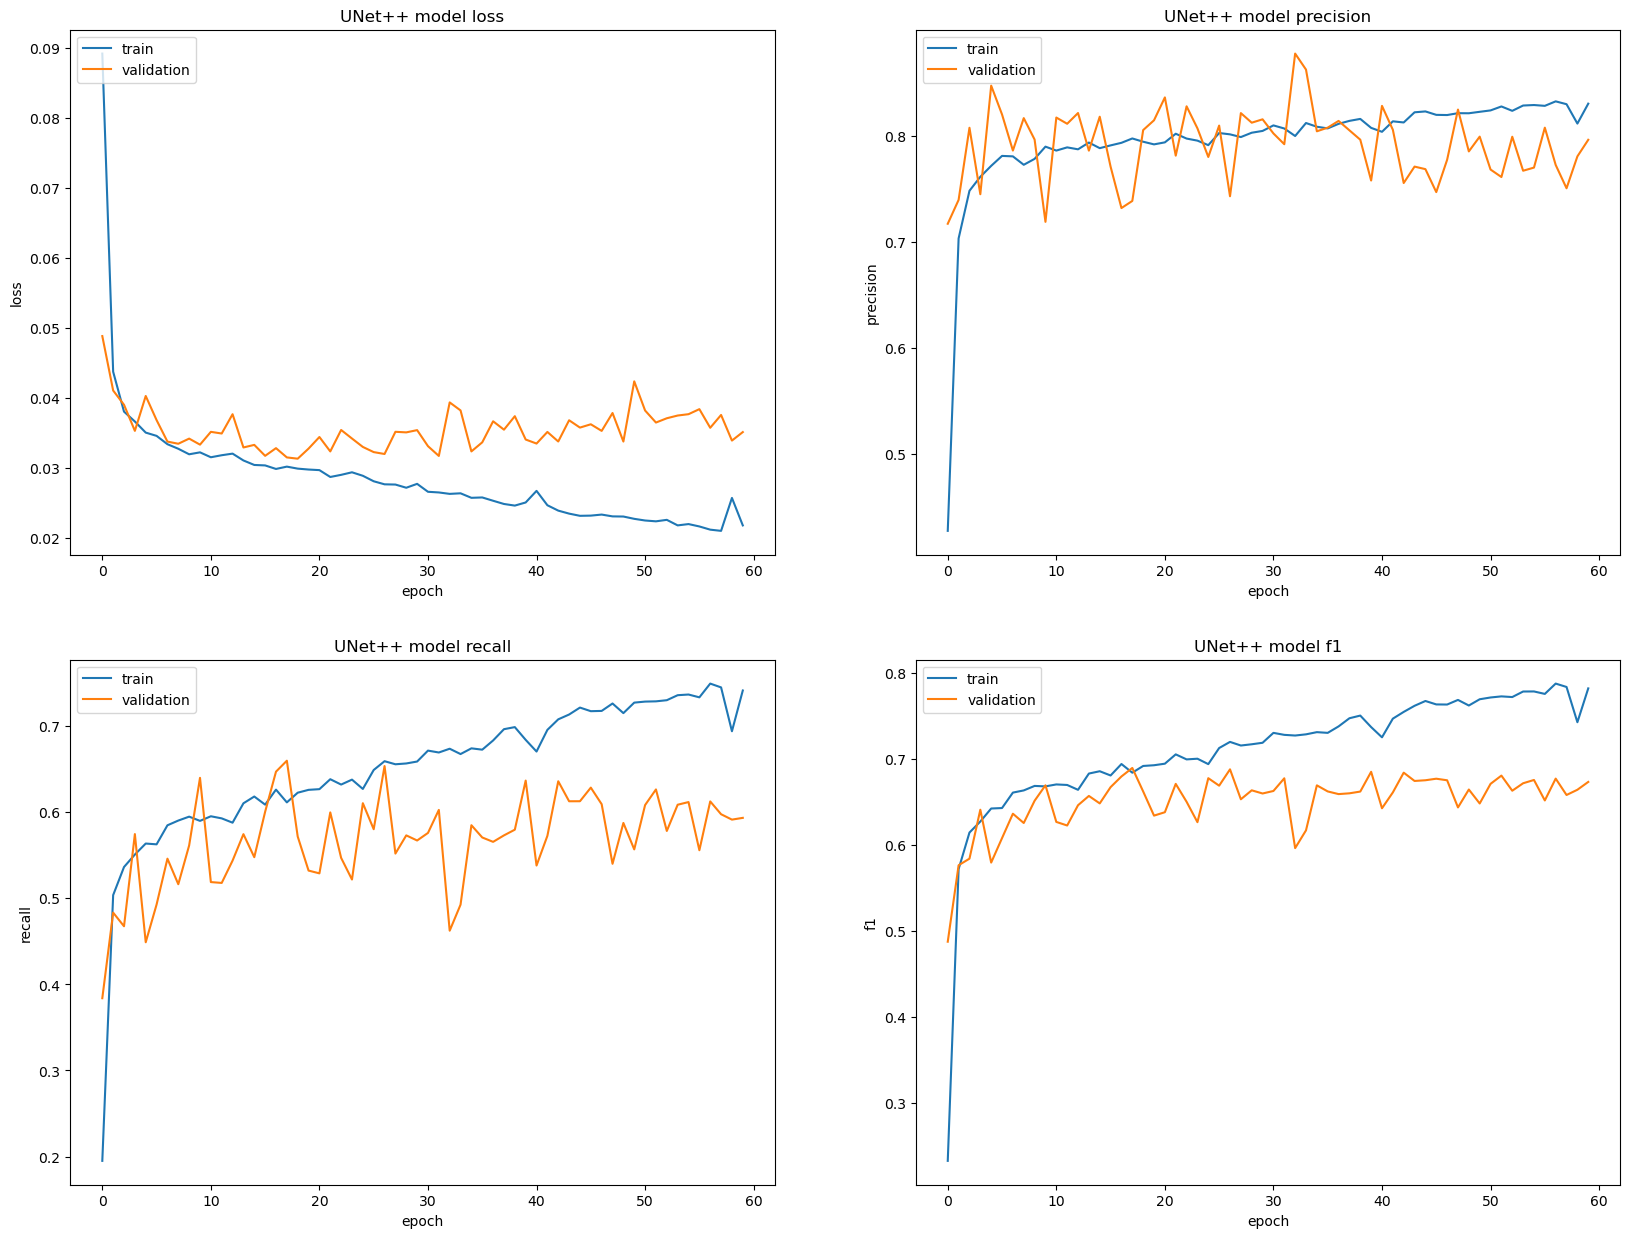

In [21]:
fig, ((ax11, ax12), (ax13, ax14)) = plt.subplots(2, 2, figsize=(20, 15))
ax11.plot(history.history['loss'])
ax11.plot(history.history['val_loss'])
ax11.set_title('UNet++ model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(history.history['precision_m'])
ax12.plot(history.history['val_precision_m'])
ax12.set_title('UNet++ model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(history.history['recall_m'])
ax13.plot(history.history['val_recall_m'])
ax13.set_title('UNet++ model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

ax14.plot(history.history['f1_m'])
ax14.plot(history.history['val_f1_m'])
ax14.set_title('UNet++ model f1')
ax14.set_ylabel('f1')
ax14.set_xlabel('epoch')
ax14.legend(['train', 'validation'], loc='upper left')

plt.show()

In [22]:
threshold = 0.5
pred_img = model.predict(x_valid)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 365ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Training Image')

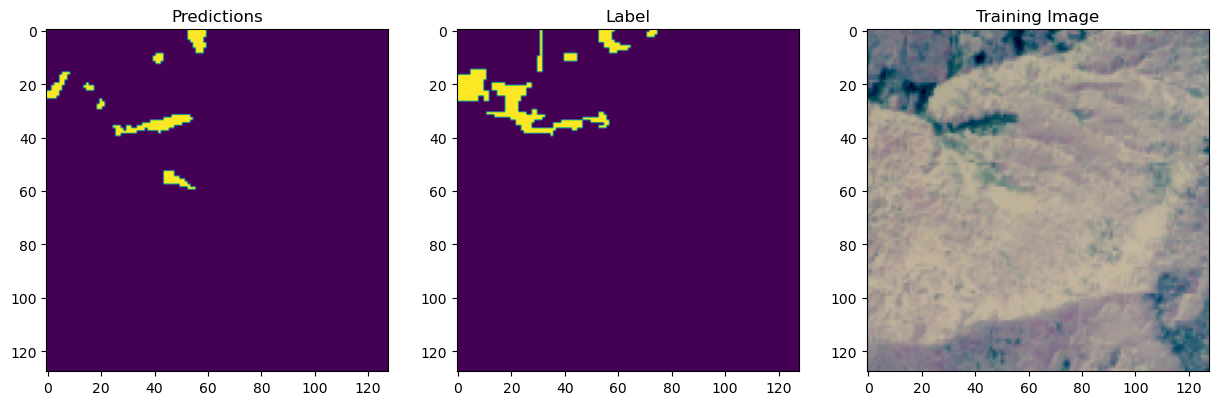

In [23]:
img = 155
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_valid[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_valid[img, :, :, 0:3])
ax3.set_title('Training Image')

In [25]:
validation_url = r"C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\*.h5"
img_val = sorted(glob.glob(validation_url))

VAL_XX = np.zeros((245, 128, 128, 6))
mask_name = []
for i, img in enumerate(img_val):
    print(i, img)
    mask_name.append(img.split('/')[-1].replace('image', 'mask'))
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # assign 0 for the nan value
        data[np.isnan(data)] = 0.000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION

0 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_1.h5
1 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_10.h5
2 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_100.h5
3 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_101.h5
4 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_102.h5
5 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_103.h5
6 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_104.h5
7 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_105.h5
8 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_106.h5
9 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\

C:\Users\satee\AppData\Local\Temp\ipykernel_19580\1703349870.py:24: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


163 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_25.h5
164 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_26.h5
165 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_27.h5
166 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_28.h5
167 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_29.h5
168 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_3.h5
169 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_30.h5
170 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_31.h5
171 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archive\ValidData\img\image_32.h5
172 C:\AMRITA FILES\Signal and Image Processing\DL_Project\Satellite\archi

In [26]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 355ms/step


(245, 128, 128, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Predicted')

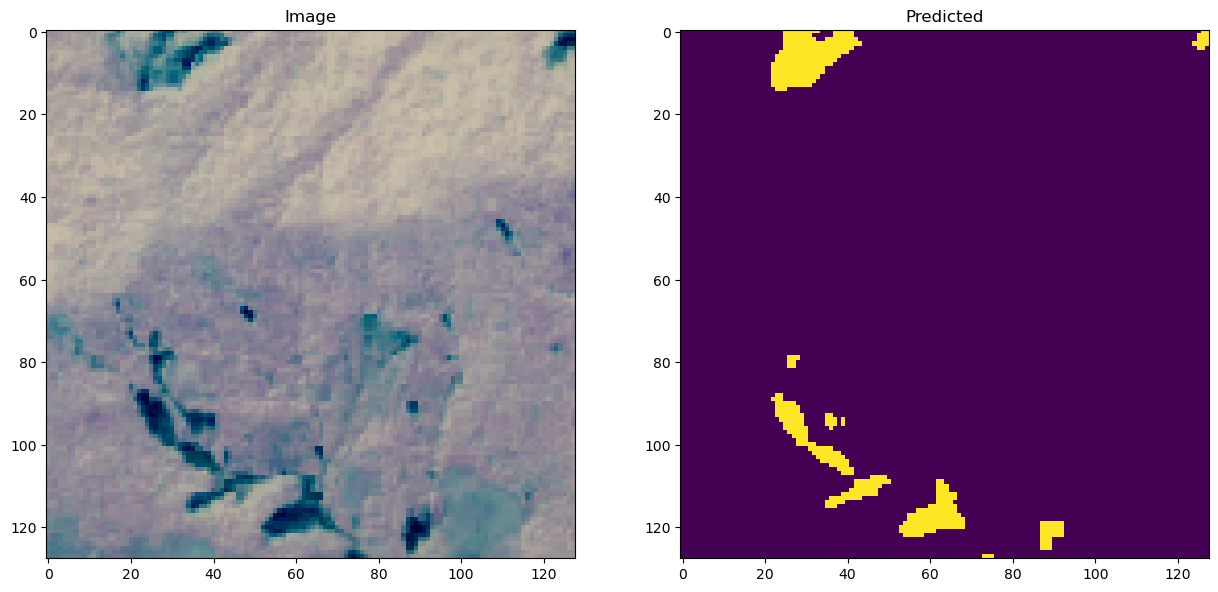

In [27]:
img = 167
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(VAL_XX[img, :, :, 0:3])
ax1.set_title('Image')
ax2.imshow(pred_img[img, :, :, 0])
ax2.set_title("Predicted")